In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/indian_liver_patient_cleaned.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
x = df.drop('Dataset', axis=1)
y = df['Dataset']

In [82]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

### model selection

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#### logistic regression

In [147]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7342657342657343
Precision: 0.7421875
Recall: 0.95
F-1 score: 0.8333333333333334


In [148]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.719412756028001

In [142]:
model_lr.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)

In [149]:
lg = LogisticRegression()
hyperparameters = {'C': np.logspace(-4, 4, 20),
                   'penalty' : ['l1', 'l2']}

clf = GridSearchCV(lg, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [150]:
best_clf.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2'}

In [151]:
model_lr = LogisticRegression(C=0.03359818286283781, penalty='l2')

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7062937062937062
Precision: 0.7164179104477612
Recall: 0.96
F-1 score: 0.8205128205128206


In [146]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.7193230922132918

#### random forest classifier

In [137]:
rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.6993006993006993
Precision: 0.7567567567567568
Recall: 0.84
F-1 score: 0.7962085308056872


In [128]:
rfc_ = RandomForestClassifier()
hyperparameters = {'n_estimators': [100, 200, 300, 1000],
                   'max_depth': [80, 90, 100, 110],
                   'min_samples_split': [2,10,20,40,80,100],
                   'min_samples_leaf': [2,10,20,40,80,100],
                   'max_features': [2, 3]}

clf = GridSearchCV(rfc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  6.6min finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to Fa

In [129]:
best_clf.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 80,
 'n_estimators': 300}

In [138]:
rfc = RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=2, min_samples_split=80, n_estimators=300)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.6993006993006993
Precision: 0.7142857142857143
Recall: 0.95
F-1 score: 0.8154506437768242


In [131]:
cross_val_score(rfc, x, y, cv=10).mean()

0.6947541266960504

In [141]:
rfc.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)

#### KNN

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.6993006993006993
Precision: 0.7435897435897436
Recall: 0.87
F-1 score: 0.8018433179723502


In [94]:
k_range = list(range(1, round(len(df) ** 0.5)))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

Text(0, 0.5, 'Testing Accuracy')

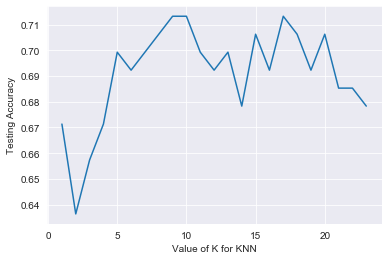

In [95]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [89]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.7132867132867133
Precision: 0.743801652892562
Recall: 0.9
F-1 score: 0.8144796380090498


In [114]:
cross_val_score(knn, x, y, cv=10).mean()

0.6912442744793017

In [140]:
knn.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)

#### SVC

In [179]:
svm = SVC(gamma='auto', probability=True)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.6993006993006993
Precision: 0.6993006993006993
Recall: 1.0
F-1 score: 0.823045267489712


In [180]:
cross_val_score(svm, x, y, cv=10).mean()

0.7123325555267479

In [181]:
svc_ = SVC()

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'gamma' : [0.001, 0.01, 0.1, 1]}

clf = GridSearchCV(svc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [182]:
best_clf.best_params_

{'C': 1, 'gamma': 0.01}

In [183]:
best_clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
svm = SVC(C=1, gamma=0.01, probability=True)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.6853146853146853
Precision: 0.7007299270072993
Recall: 0.96
F-1 score: 0.8101265822784811


In [186]:
cross_val_score(svm, x, y, cv=10).mean()

0.7140880217785844

#### comparing model (after hyperparam tuning)

In [187]:
a = [['logistic regression',model_lr.score(X_test, y_test),precision_score(y_test, model_lr.predict(X_test)), recall_score(y_test, model_lr.predict(X_test)),f1_score(y_test, model_lr.predict(X_test)), cross_val_score(model_lr, x, y, cv=10).mean()],
     ['rfc', rfc.score(X_test, y_test),precision_score(y_test, rfc.predict(X_test)),recall_score(y_test, rfc.predict(X_test)),f1_score(y_test, rfc.predict(X_test)), cross_val_score(rfc, x, y, cv=10).mean()],
     ['knn', knn.score(X_test, y_test), precision_score(y_test, knn.predict(X_test)),recall_score(y_test, knn.predict(X_test)), f1_score(y_test, knn.predict(X_test)), cross_val_score(knn, x, y, cv=10).mean()],
     ['svc', svm.score(X_test, y_test), precision_score(y_test, svm.predict(X_test)),recall_score(y_test, svm.predict(X_test)), f1_score(y_test, svm.predict(X_test)), cross_val_score(svm, x, y, cv=10).mean()],
    ]

dfcompare = pd.DataFrame(a, columns=['model', 'Accuracy','Precision','Recall','F-1 score','Cross Val Score'])
dfcompare


,model,Accuracy,Precision,Recall,F-1 score,Cross Val Score
0,logistic regression,0.706294,0.716418,0.96,0.820513,0.719323
1,rfc,0.699301,0.714286,0.95,0.815451,0.693029
2,knn,0.678322,0.728814,0.86,0.788991,0.691244
3,svc,0.685315,0.700730,0.96,0.810127,0.714088


Dari pengujian tersebut saya memutuskan untuk memilih menggunakan Logistic Regression.

In [188]:
import pickle

pickle.dump(model_lr, open('model_ilp', 'wb'))

In [189]:
loadModel = pickle.load(open('model_ilp', 'rb'))

In [190]:
loadModel

LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
loadModel.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)